# EDA

In this notebook, I vectorize the titles which were cleaned and tokenized in the previous notebook.  Next I perform EDA and search for interesting relationships and visualizations.

In [291]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
df_clean = pd.read_csv('./data/clean_token_titles.csv')

In [96]:
df_clean.head()

,title,is_evolution
0,anti evolution courses udemy,1
1,birds stopped flying pbs eons,1
2,currently researching creationism evolution,1
3,flaws see savanna hypothesis explanation human...,1
4,female insects evolved penises,1


In [97]:
X = df_clean['title']
y = df_clean['is_evolution']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [98]:
cv = CountVectorizer(min_df=3)
cv.fit(X_train)
words = cv.transform(X_train)
words = pd.DataFrame(words.toarray(), columns=cv.get_feature_names())

words['subreddit'] = y_train.map(lambda x: 'Evolution' if x == 1 else 'Creation').values

words.head()

In [242]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [261]:
# top 20 words in titles from the evolution subreddit
common_evo = words.loc[words['subreddit'] == 'Evolution', :'zombie'].sum().sort_values(ascending=False)[:20]
common_evo

evolution       202
human            71
evolutionary     61
humans           58
species          51
life             38
book             32
new              31
review           28
theory           27
evolve           27
selection        24
genetic          23
pbs              23
eons             23
evolved          23
years            21
like             20
good             19
dna              19
dtype: int64

In [321]:
common_evo_df = pd.DataFrame(common_evo)
common_evo_df.rename(columns={0:'Evolution'}, inplace=True)
common_evo_df

,Evolution
evolution,202
human,71
evolutionary,61
humans,58
species,51
life,38
book,32
new,31
review,28
theory,27


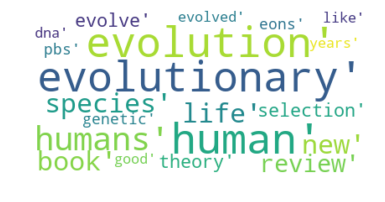

In [283]:
wordcloud = WordCloud(max_font_size=50, background_color='white').generate(str(list(common_evo.index)))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [269]:
# top 20 words in titles from the creation subreddit
common_crea = words.loc[words['subreddit'] == 'Creation', :'zombie'].sum().sort_values(ascending=False)[:20]
common_crea

evolution       100
creation         51
science          41
new              36
years            33
earth            31
evidence         30
flood            30
human            29
design           28
post             26
intelligent      24
would            23
scientists       23
god              22
study            21
creationists     21
vs               21
theory           20
creationist      20
dtype: int64

In [322]:
common_crea_df = pd.DataFrame(common_crea)
common_crea_df.rename(columns={0:'Creation'}, inplace=True)
common_crea_df

,Creation
evolution,100
creation,51
science,41
new,36
years,33
earth,31
evidence,30
flood,30
human,29
design,28


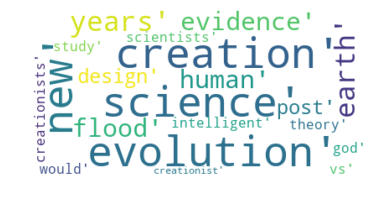

In [288]:
wordcloud = WordCloud(max_font_size=50, background_color='white').generate(str(list(common_crea.index)))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

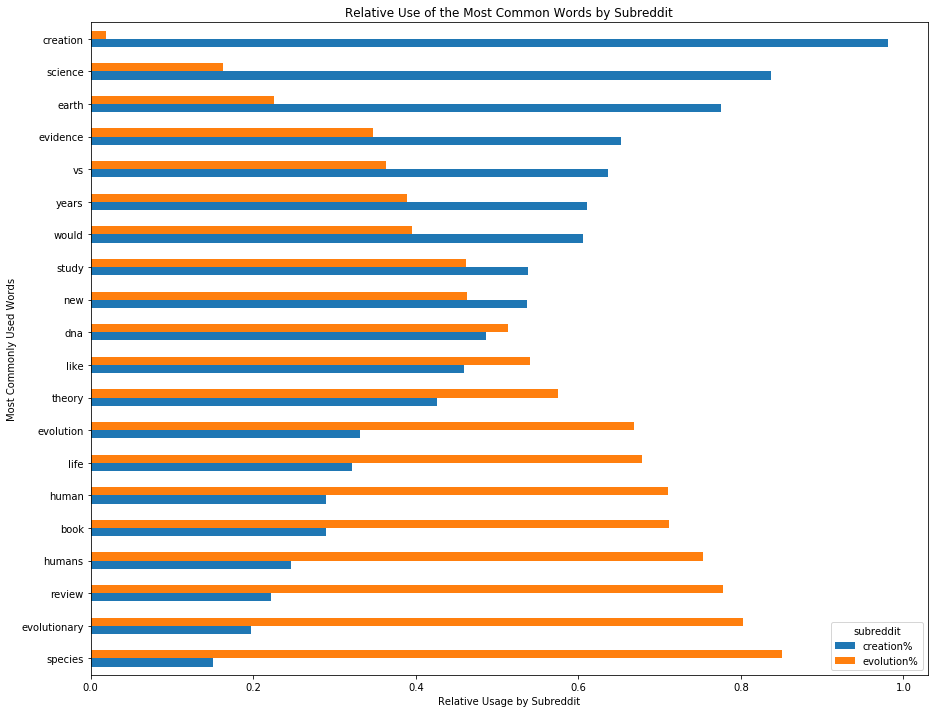

In [238]:
# Creating a list of the most common words
most_common = list(words.drop('subreddit', axis=1).sum().sort_values(ascending=False)[:20].index)

# Filtering the dataframe to create a dataframe of just the most common words
common_df = words.groupby('subreddit').sum()[most_common].T.sort_values(by='Creation', ascending=False)

# Creating columns of totals and percentages
common_df['total'] = common_df['Creation'] + common_df['Evolution']
common_df['creation%'] = common_df['Creation'] / common_df['total']
common_df['evolution%'] = common_df['Evolution'] / common_df['total']

# Creating a chart showing the relative uses of the most common words
ax = common_df[['creation%', 'evolution%']].sort_values(by='creation%').plot(kind='barh', figsize=(15,12))
ax.set_xlabel('Relative Usage by Subreddit')
ax.set_ylabel('Most Commonly Used Words')
ax.set_title('Relative Use of the Most Common Words by Subreddit');

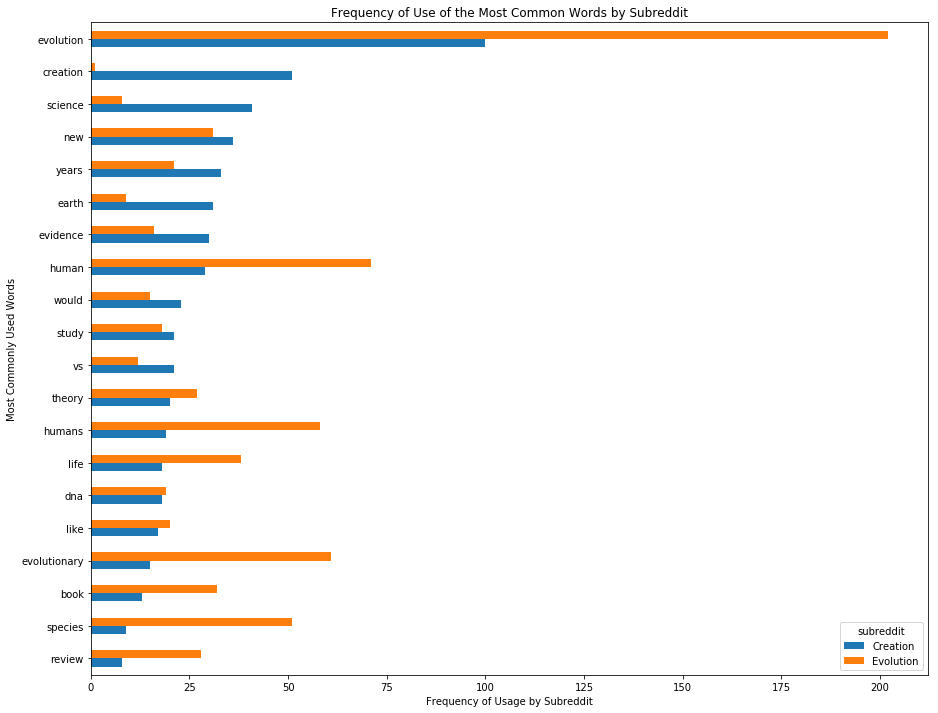

In [241]:
ax = common_df[['Creation', 'Evolution']].sort_values(by='Creation').plot(kind='barh', figsize=(15,12))
ax.set_xlabel('Frequency of Usage by Subreddit')
ax.set_ylabel('Most Commonly Used Words')
ax.set_title('Frequency of Use of the Most Common Words by Subreddit');

In [122]:
# transposing the groupby dataframe in order to be able to sort by subreddit more easily
gb = words.groupby('subreddit').sum().T

In [123]:
# words used most in Evolution that are not used in Creation
gb[gb['Creation'] == 0].sort_values(by='Evolution', ascending=False).head(10)

subreddit,Creation,Evolution
eons,0,23
pbs,0,23
sexual,0,12
survival,0,10
adaptive,0,9
primates,0,8
simulator,0,8
artificial,0,7
advantage,0,6
male,0,6


In [124]:
# words used most in Creation that are not used in Evolution
gb[gb['Evolution'] == 0].sort_values(by='Creation', ascending=False).head(10)

subreddit,Creation,Evolution
flood,30,0
article,15,0
yec,13,0
id,12,0
noah,10,0
genesis,10,0
moon,10,0
entropy,9,0
matter,9,0
creationevolution,9,0


## TF-IDF

In [306]:
tvec = TfidfVectorizer(min_df=3)
words2 = pd.DataFrame(tvec.fit_transform(X_train).toarray(),
                      columns=tvec.get_feature_names())
words2['subreddit'] = y_train.map(lambda x: 'Evolution' if x == 1 else 'Creation').values
words2.head()

,000,10,100,15,200,2018,24,30,3000,3d,...,year,years,yec,yecs,yes,yet,young,youtube,zombie,subreddit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Creation
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Evolution
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Creation
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Creation
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Evolution


In [308]:
words2.loc[words['subreddit'] == 'Evolution', :'zombie'].sum().sort_values(ascending=False)[:20]

evolution       60.082465
human           25.463608
evolutionary    19.665623
humans          19.562988
species         17.924627
book            14.002832
life            13.637205
evolve          12.736431
review          11.995185
pbs             11.036168
eons            11.036168
theory          11.025713
genetic         10.092474
question         9.630545
selection        9.591978
new              9.278301
evolved          8.972547
dna              7.855679
good             7.510622
ancient          7.326433
dtype: float64

In [310]:
words2.drop('subreddit', axis=1).sum().sort_values(ascending=False)[:20]

evolution       87.893713
human           33.574375
evolutionary    25.901422
humans          24.239900
creation        21.691855
species         20.866462
life            20.201956
new             19.531866
book            18.696918
evidence        18.555863
theory          18.009919
science         17.611204
dna             15.774471
review          15.681490
question        15.366026
flood           14.771327
genetic         14.662911
evolve          14.610241
vs              14.297550
years           13.897163
dtype: float64

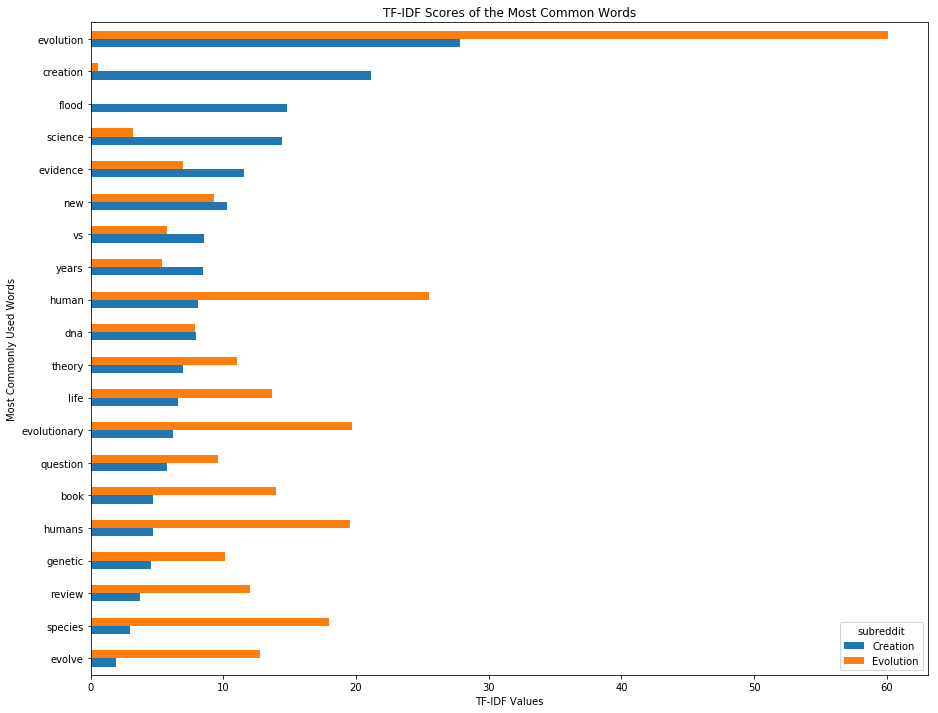

In [323]:
# Create a list of the most common words
most_common2 = list(words2.drop('subreddit', axis=1).sum().sort_values(ascending=False)[:20].index)

# Filter the dataframe to create a dataframe of just the most common words
common_df2 = words2.groupby('subreddit').sum()[most_common2].T.sort_values(by='Creation', ascending=False)

# Create columns of totals and percentages
common_df2['total'] = common_df2['Creation'] + common_df2['Evolution']
common_df2['creation%'] = common_df2['Creation'] / common_df2['total']
common_df2['evolution%'] = common_df2['Evolution'] / common_df2['total']

# Create a chart showing the relative uses of the most common words
ax = common_df2[['Creation','Evolution']].sort_values(by='Creation').plot(kind='barh', figsize=(15,12))
ax.set_xlabel('TF-IDF Values')
ax.set_ylabel('Most Commonly Used Words')
ax.set_title('TF-IDF Scores of the Most Common Words');

TF-IDF returned essentially the same results as CountVectorizer with some slight differences, which I believe to be a result of the relatively limited dataset of approximatedly 2000 posts.  I chose to move forward with CountVectorizer only in the interest of consistency, but a great followup would be to perform modeling with the TF-IDF vectorized values as well.  